# ODE Solvers: Euler's Method and (Relevant) Runge-Kutta Methods

In [6]:
using DifferentialEquations, Plots

Suppose we are attempting to find the solution to the first-order differential equation
$$
\dot{x} = \cos(t) x
$$
With $x(0) = 1$. We note that the solution to this differential equation is $x(t) = e^{\sin(t)}$. We attempt to approximate the solution to the differential equation using 3 different Runge-Kutta Methods: Euler's Method, RK4 and Dormand-Prince 5th Order Method.

┌ Warning: Skipped marker arg circle.
└ @ Plots /Users/james/.julia/packages/Plots/sxUvK/src/args.jl:1149


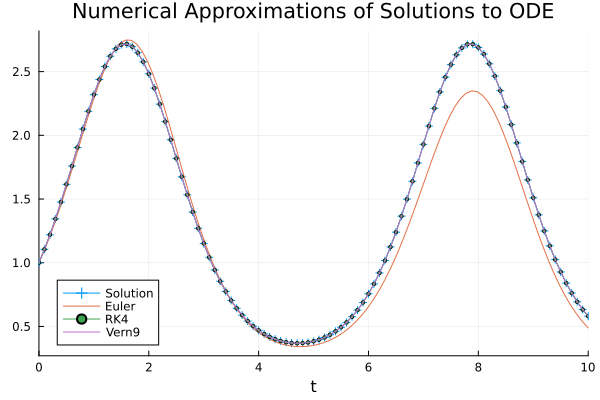

In [165]:
# Define the Problem
function ode_problem!(dx, x, p, t)
    dx[1] = cos(t) * x[1]
end
u0 = [1.0]
T = 10.0
tspan = (0.0, T)
prob = ODEProblem(ode_problem!, u0, tspan)

times = 0:0.1:T
# Actual Solution
actualsol = exp.(sin.(times))
plot(times, actualsol, marker=:+, label="Solution", title="Numerical Approximations of Solutions to ODE")

# Euler's Method
euler = solve(prob, Euler(), tstops=times)
plot!(euler, label="Euler")

# RK4
rk4 = solve(prob, RK4(), tstops=times)
rk4_discrete = [rk4(time)[1] for time in times]
plot!(times, rk4_discrete, marker=:"circle", markersize=:2, label="RK4")

# Vern9
vern9 = solve(prob, Vern9(), tstops=times)
vern9_discrete = [vern9(time)[1] for time in times]
plot!(times, vern9_discrete, label="Vern9")


In [170]:
# Calculating Error of Approximation, assuming both actual and predicted measure the function at same times
function loss_function(actual, predicted)
    sum(abs.(actual .- predicted))
end
println("Sum of Errors of Euler approximation: ", loss_function(actualsol, euler))
println("Sum of Errors of RK4 approximation: ", loss_function(actualsol, rk4_discrete))
println("Sum of Errors of Vern9 approximation: ", loss_function(actualsol, vern9_discrete))

Sum of Errors of Euler approximation: 9305.807927541871
Sum of Errors of RK4 approximation: 2.6304972084667533e-5
Sum of Errors of Vern9 approximation: 6.4161453927624734e-12
